In [1]:
import allel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mop = np.array([False] * 308452471)
with open("../data/mop/v5--Teo--random1_Palmar_Chico--chr1--0--308452471.bed") as f:
    for line in f:
        chrom, start, stop = line.strip().split()
        mop[int(start):int(stop)] = True

In [3]:
callset = allel.read_vcf('../data/angsd_vcf/v5--Teo--random1_Palmar_Chico--chr1--0--308452471.vcf.gz')

In [94]:
chroms = callset["variants/CHROM"]
positions = np.extract(chroms == "chr1", callset["variants/POS"])
gts = allel.GenotypeArray(callset["calldata/GT"]).count_alleles()

In [95]:
gts

<AlleleCountsArray shape=(4673691, 2) dtype=int32>
18  2
18  2
19  1
...
4 2
4 2
6 2

In [127]:
ska_pi = allel.windowed_diversity(positions, gts, start=0, stop=308452471, size = int(1e4), step = int(1e4), is_accessible=mop)

/home/stittes/anaconda3/envs/r-environment/lib/python3.7/site-packages/allel/util.py:187: UserWarning: Some variants were inaccessible and hence masked.
  warnings.warn("Some variants were inaccessible and hence masked.")
/home/stittes/anaconda3/envs/r-environment/lib/python3.7/site-packages/allel/stats/window.py:422: RuntimeWarning: divide by zero encountered in true_divide
  y = np.where(n_bases > 0, x / n_bases, fill)


In [130]:
pi = ska_pi[0][ska_pi[0] > 0]
np.nanmean(pi)
np.nanmin(pi)

1e-05

(array([2.5936e+04, 3.2110e+03, 3.2000e+01, 1.2000e+01, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000000e-05, 1.52721579e-02, 3.05343158e-02, 4.57964737e-02,
        6.10586316e-02, 7.63207895e-02, 9.15829474e-02, 1.06845105e-01,
        1.22107263e-01, 1.37369421e-01, 1.52631579e-01]),
 <BarContainer object of 10 artists>)

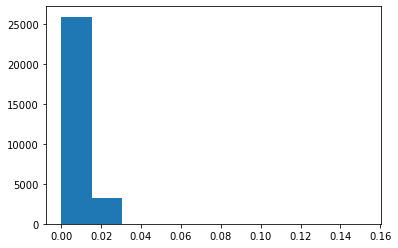

In [129]:
plt.hist(pi)